<font color="#CA3532"><h1 align="left">Inteligencia Artificial Aplicada a la Bolsa (MIAX-11)</h1></font>
<font color="#5b5a59"><h2 align="left">Práctica de Aprendizaje Automático</h2></font>
<font color="#5b5a59"><h3 align="left">Noviembre 2023</h3></font>

Última actualización: 24/11/2023

En esta práctica trabajaremos con una versión modificada del problema [Bank Marketing](http://archive.ics.uci.edu/dataset/222/bank+marketing), consistente en predecir si los clientes de una entidad bancaria contratarán o no un nuevo depósito.

Tienes dos conjuntos de datos disponibles:

- ``bank-transformed-train.csv``, contiene 34921 patrones etiquetados (la columna y es la variable a predecir, que toma los valores yes y no).
- ``bank-transformed-test-no-labels.csv``, contiene 6267 patrones no etiquetados (se ha omitido la columna y).

Los **objetivos generales** de la práctica son:

1. Utilizar los datos del primer conjunto para entrenar un modelo de aprendizaje automático que prediga las etiquetas a partir del resto de atributos.

2. Aplicar el modelo a los datos del segundo conjunto para estimar la probabilidad, para cada uno de los patrones, de que su valor en la columna y sea yes.

Deberás entregar un fichero con las probabilidades asignadas por tu modelo a cada uno de los patrones del conjunto de test, respetando el orden del fichero.

Para más detalles acerca del problema puedes consultar la descripción en http://archive.ics.uci.edu/dataset/222/bank+marketing, pero ten en cuenta que hemos realizado algunas modificaciones en los datos.

**Normas de entrega:**

Deberás entregar el siguiente material antes de la fecha establecida en el calendario del máster:

- Un fichero con nombre ``pml.py`` que contenga con todas las funciones y clases que se describen en los ejercicios.

- Este notebook con todas las pruebas realizadas.

- Un fichero con nombre ``predictions.csv`` con las predicciones realizadas sobre los datos de test (ver ejercicio 11).

- Un fichero con nombre ``informe.pdf`` que contenga un informe de los resultados obtenidos (ver ejercicio 12).









In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

**Ejercicio 1:** Implementa la función ``load_data(fname)`` que recibe el nombre de un fichero y devuelve los datos contenidos en el fichero como un dataframe de Pandas.

A continuación se muestra un ejemplo de uso.

In [132]:
from pml import load_data

In [133]:
data_train = load_data('bank-transformed-train.csv')
data_test = load_data('bank-transformed-test-no-labels.csv')

In [134]:
display(data_train)

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,57,blue-collar,married,professional.course,unknown,no,yes,telephone,2,999,1,unknown,1.4,94.465,-41.8,4.866,5228.1,no
1,31,blue-collar,married,basic,no,no,yes,telephone,4,999,2,unknown,1.1,93.994,-36.4,4.857,5191.0,no
2,39,services,unknown,basic,no,yes,no,cellular,5,999,2,unknown,-0.1,93.200,-42.0,4.076,5195.8,no
3,48,blue-collar,married,basic,no,yes,no,telephone,5,999,0,unknown,1.1,93.994,-36.4,4.864,5191.0,yes
4,37,blue-collar,married,basic,no,no,no,telephone,5,999,2,unknown,1.1,93.994,-36.4,4.856,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34916,26,services,married,high.school,no,yes,no,cellular,0,999,2,unknown,-1.8,92.893,-46.2,1.299,5099.1,no
34917,27,technician,married,university.degree,no,yes,no,cellular,3,999,1,unknown,-0.1,93.200,-42.0,4.592,5195.8,yes
34918,48,services,married,university.degree,unknown,no,no,cellular,3,999,1,unknown,-1.8,92.893,-46.2,1.291,5099.1,no
34919,36,admin.,married,high.school,no,no,no,telephone,1,999,0,unknown,1.4,94.465,-41.8,4.961,5228.1,no


In [135]:
display(data_test)

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,42,technician,married,university.degree,no,no,no,telephone,4,25,1,success,-3.4,92.431,-26.9,0.728,5017.5
1,30,technician,divorced,university.degree,no,no,no,cellular,3,999,0,unknown,1.4,93.444,-36.1,4.965,5228.1
2,34,admin.,single,university.degree,no,yes,no,cellular,3,999,2,unknown,1.4,93.918,-42.7,4.963,5228.1
3,35,unknown,married,basic,unknown,yes,yes,telephone,2,999,1,unknown,1.1,93.994,-36.4,4.855,5191.0
4,60,other,married,basic,no,yes,unknown,cellular,3,999,2,unknown,-1.8,92.893,-46.2,1.264,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,23,student,single,high.school,no,yes,no,cellular,3,999,-1,unknown,-1.8,93.075,-47.1,1.405,5099.1
6263,41,technician,married,university.degree,no,yes,no,cellular,3,999,-1,unknown,1.4,93.918,-42.7,4.961,5228.1
6264,28,student,single,professional.course,no,no,yes,cellular,4,999,1,unknown,-1.8,92.893,-46.2,1.259,5099.1
6265,26,blue-collar,single,basic,no,yes,no,telephone,6,999,2,unknown,1.1,93.994,-36.4,4.855,5191.0


**Ejercicio 2:** Realiza un análisis exploratorio de los datos e incluye los resultados en el informe. Comenta las transformaciones que consideras necesarias para adaptar los datos de cara a aplicar con éxito los modelos de aprendizaje automático.

**Ejercicio 3:** Implementa la clase ``DataTransformer`` para transformar los datos del problema.

El constructor no recibirá argumentos (ten en cuenta que las trasnformaciones son específicas para este problema), pero creará los elementos necesarios para realizar la transformación de los datos.

La clase tendrá un método ``prepare_data(self, df, test=False)`` que preparará los datos aplicando las transformaciones que consideres oportunas de acuerdo al análisis realizado en el ejercicio 2 (manejo de outliers y valores ausentes, normalización, cambio de representación de variables, etc.). Los argumentos de la función son:

- Un dataframe, ``df``, con los datos.
- La variable booleana ``test``, que indica si la transformación se debe aplicar a datos de entrenamiento (``test=False``, valor por defecto) o a datos de test (``test=True``). En el primer caso, además de transformar los datos, se almacenarán los elementos necesarios para poder aplicar la misma transformación con posterioridad sobre los datos de test. En el segundo caso se aplicará a los datos la misma transformación realizada (y guardada) en una llamada previa a la función (sobre los datos de entrenamiento).

El método devuelve:

- Si ``test=False``, una tupla ``(x, t)``, donde ``x`` y ``t`` son dos dataframes con los atributos y los targets respectivamente.
- Si ``test=True``, una tupla ``(x, None)``, donde ``x`` es un dataframe con los atributos.

A continuación se muestra un ejemplo de uso.

In [136]:
from pml import DataTransformer

In [137]:
transformer = DataTransformer()
x_train, t_train = transformer.prepare_data(data_train)
x_test, _ = transformer.prepare_data(data_test, test=True)

**Ejercicio 4:** Implementa la función ``pca(data, pvar)`` que calcula las componentes principales de los datos contenidos en el dataframe ``data``. La función calcula y devuelve un dataframe con las ``n`` primeras componentes, hasta completar una varianza explicada mayor o igual que ``pvar`` (número entre 0 y 1).  

Se muestra un ejemplo a continuación.

In [138]:
from pml import pca

In [139]:
data_pca = pca(x_train[['emp.var.rate',	'cons.price.idx',	'cons.conf.idx', 'euribor3m']], 0.9)
display(data_pca)

,pc1,pc2
0,-1.665716,-0.739324
1,-1.345134,0.616078
2,0.309946,-0.116501
3,-1.347490,0.616164
4,-1.344797,0.616066
...,...,...
34916,2.333920,-0.783673
34917,0.136248,-0.110174
34918,2.336613,-0.783771
34919,-1.697695,-0.738159


**Ejercio 5:** Construye la función ``feature_importance(x, t, clf, n=None)`` que calcule y devuelva la importancia por permutación de cada variable en el dataframe ``x``. Los argumentos de la función son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Un clasificador ``clf``, entrenado previamente con los datos ``x``, ``t``.
- Un número ``n`` (opcional) que indica el número de variables a devolver.

La función devuelve un dataframe con las importancias por permutación de las ``n`` variables más importantes, ordenadas de mayor a menor. Si ``n`` es ``None`` el dataframe devuelto contendrá todas las variables.

A continuación se muestra un ejemplo.

In [140]:
from pml import feature_importance

In [141]:
dtree = DecisionTreeClassifier(max_depth=7)
_ = dtree.fit(x_train, t_train)

In [142]:
imp = feature_importance(x_train, t_train, dtree, n=10)
display(imp)

,ft,imp
9,nr.employed,0.036282
3,pdays,0.014287
8,euribor3m,0.007861
5,emp.var.rate,0.005195
7,cons.conf.idx,0.004255
34,contact_telephone,0.003852
2,campaign,0.003714
35,poutcome_fail,0.002546
0,age,0.002228
6,cons.price.idx,0.001523


**Ejercicio 6:** Implementa la función ``train_classifier_single_test(x, t, clf, ptest=0.3, seed=None)`` que entrena y evalúa un clasificador utilizando una única partición ``train-test`` de los datos. Los argumentos son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Un clasificador ``clf`` no entrenado.
- La fracción ``ptest`` de los datos utilizada como test, por defecto es 0.3.
- Un número ``seed`` (opcional) utilizado para inicializar el generador de números aleatorios y tener resultados reproducibles.

La función realizará una partición de los datos en un conjunto de entrenamiento y uno de test, entrenará el clasificador con los datos de entrenamiento y lo evaluará con los datos de test.

La función debe devolver una tupla ``(strain, stest, clf)``, donde ``strain`` es el *score* obtenido sobre los datos de train, ``stest`` es el *score* obtenido sobre los datos de test y ``clf`` es el clasificador entrenado.

A continuación se muestra un ejemplo.

In [143]:
from pml import train_classifier_single_test

In [144]:
clf = DecisionTreeClassifier(max_depth=7)
train_classifier_single_test(x_train, t_train, clf)

(0.9072574046800851, 0.9006394960389424, DecisionTreeClassifier(max_depth=7))

**Ejercicio 7:** Implementa la función ``train_classifier_nfold_val(x, t, clf, nfolds=5, seed=None)`` que entrena y evalúa un clasificador utilizando validación cruzada. Los argumentos son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Un clasificador ``clf`` no entrenado.
- El número de pliegues ``nfolds`` a utilizar, que por defecto es 5.
- Un número ``seed`` (opcional) utilizado para inicializar el generador de números aleatorios y tener resultados reproducibles.

La función realizará una validación cruzada de ``nfold`` pliegues. Para generar los índices de entrenamiento y validación en cada uno de los pliegues es recomendable utilizar la clase [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) de Scikit-Learn.

La función debe devolver una lista de ``nfolds`` tuplas (una por cada pliegue). Cada tupla será de la forma ``(strain, sval, clf)``, donde ``strain`` y ``sval`` son los *scores* obtenidos sobre los datos de train y validación de cada pliegue, y ``clf`` es el clasificador correspondiente.

A continuación se muestra un ejemplo.

In [145]:
from pml import train_classifier_nfold_val

In [146]:
clf = LogisticRegression(max_iter=1000)
res = train_classifier_nfold_val(x_train, t_train, clf)
res

[(0.8996635166093929, 0.9007874015748032, LogisticRegression(max_iter=1000)),
 (0.9006335683860114, 0.897766323024055, LogisticRegression(max_iter=1000)),
 (0.8995239288398897, 0.9016323024054983, LogisticRegression(max_iter=1000)),
 (0.9004187994416007, 0.8964776632302406, LogisticRegression(max_iter=1000)),
 (0.9001324408490532, 0.89790950744559, LogisticRegression(max_iter=1000))]

**Ejercicio 8:** Implementa la función ``fit_hyperparams(x, t, models, nfolds=5, seed=None)`` que entrena y evalúa un conjunto de clasificadores utilizando validación cruzada. Los argumentos son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Una lista ``models`` de clasificadores no entrenados.
- El número de pliegues ``nfolds`` a utilizar, por defecto es 5.
- Un número ``seed`` (opcional) utilizado para inicializar el generador de números aleatorios y tener resultados reproducibles.

La función llamará a la función ``train_classifier_nfold_val`` del ejercicio 7 con cada clasificador de la lista ``models``, y seleccionará el que tenga un mejor score promedio en validación.
El mejor modelo se reentrenará utilizando todos los datos diponibles ``(x, t)``.

La función debe devolver la tupla ``(best_model, res)``, donde ``best_model`` es el mejor clasificador (reentrenado con todos los datos) y ``res`` es una lista de tuplas de la forma ``(clf, mean_score)``, donde ``clf`` es cada uno de los clasificadores en la lista ``models`` y ``mean_score`` es el score promedio obtinido por ese clasificador sobre todos los conjuntos de validación.

A continuación se muestra un ejemplo.

In [147]:
from pml import fit_hyperparams

In [149]:
models = [LogisticRegression(C=c, max_iter=1000) for c in [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]]
clf, res = fit_hyperparams(x_train, t_train, models, nfolds=5, seed=127)
print(clf)
print(res)

LogisticRegression(C=0.01, max_iter=1000)
[(LogisticRegression(C=0.0001, max_iter=1000), 0.8882334424691759), (LogisticRegression(C=0.001, max_iter=1000), 0.9001461444545299), (LogisticRegression(C=0.01, max_iter=1000), 0.9002320428081447), (LogisticRegression(C=0.1, max_iter=1000), 0.8997165706910817), (LogisticRegression(max_iter=1000), 0.899544769884083), (LogisticRegression(C=10.0, max_iter=1000), 0.8994874961154691)]


**Ejercicio 9:** Implementa la función ``def get_metrics(x, t, clf, target_class=1)`` que devuelve un conjunto de métricas de evaluación para el clasificador ``clf`` sobre los datos ``x``, ``t``. Los argumentos son:

- Un dataframe ``x`` con los datos del problema, excluida la clase.
- Un dataframe ``t`` con las clases.
- Un clasificador ``clf`` previamente entrenado.
- La clase objetivo, ``target_class``, que por defecto es la clase 1 (yes).

La función debe devolver la tupla ``(score, cmatrix, fpr, tpr, roc_auc, precision, recall, ap)``, donde:

- ``score`` es el score.
- ``cmatrix`` es la matriz de confusión.
- ``fpr`` es el false positive rate.
- ``tpr`` es el true positive rate.
- ``roc_auc`` es el área bajo la curva ROC.
- ``precision`` es la precisión.
- ``recall`` es el recall.
- ``ap`` es la average precision.

A continuación se muestra un ejemplo.

In [150]:
from pml import get_metrics

In [151]:
score, cmatrix, fpr, tpr, roc_auc, precision, recall, ap = get_metrics(x_train, t_train, clf, target_class=1)
print(f"score = {score}")
print("Confusion matrix:")
print(cmatrix)

score = 0.9003178603132785
Confusion matrix:
[[30674   344]
 [ 3137   766]]


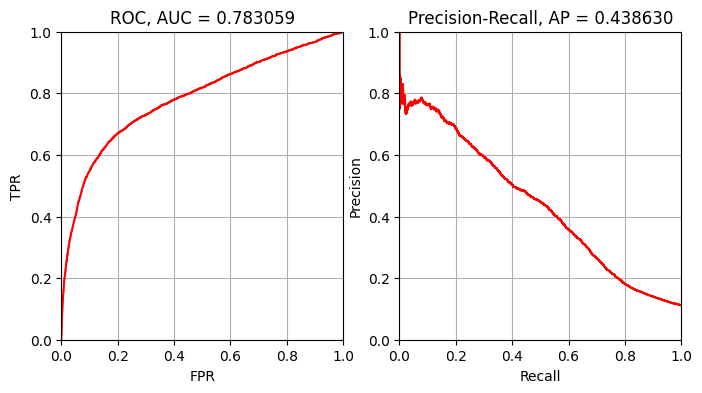

In [152]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC, AUC = %f" % roc_auc)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, 'r-')
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall, AP = %f" % ap)
plt.show()

*Nota:* Ten en cuenta que las métricas anteriores las estamos obteniendo sobre el conjunto de entrenamiento. Sería interesante separar de estos datos un conjunto de test y obtener las métricas sobre este último.

**Ejercicio 10:** Implementa la función ``predict_test(clf, x, fname)`` que aplica el clasificador ``clf`` a los datos de test ``x`` y escribe en el fichero ``fname`` las probabilidades asignadas a la clase 1 (yes). La función devuelve un dataframe con estas probabilidades.

A continuación se muestra un ejemplo de aplicación sobre los datos de test del fichero ``bank-transformed-test-no-labels.csv``. El orden de los datos en el fichero se debe conservar.



In [153]:
from pml import predict_test

In [154]:
predict_test(clf, x_test, 'predictions.csv')

,y
0,0.573319
1,0.051756
2,0.065940
3,0.034619
4,0.187768
...,...
6262,0.195303
6263,0.055640
6264,0.181507
6265,0.039738


**Ejercicio 11:** Utiliza las funciones anteriores, y posiblemente otras que consideres necesarias, para estimar las probabilidades de clase 1 (yes) de todos los puntos contenidos en el fichero ``bank-transformed-test-no-labels.csv``. Guarda estas probabilidades en un fichero con nombre ``predictions.csv`` e inclúyelo como parte de la entrega. El orden del fichero no se debe alterar.

A modo de ejemplo se facilita el fichero ``random_predictions.csv`` que muestra la estructura esperada.

**Ejercicio 12:** Redacta un informe en pdf con un resumen de tus resultados, que incluya al menos:
- Una introducción al problema.
- El análisis exploratorio de los datos.
- Una descripción del preprocesamiento aplicado a los datos.
- Un estudio de la importancia de los atributos, que incluya en caso necesario una selección de los mismos.
- Los resultados de validación de modelos, incluyendo tablas y gráficas.
- La decisión sobre el modelo final a aplicar a los datos, y los resultados que se esperan.
- Unas breves conclusiones.